In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = pd.read_csv("Data.csv", error_bad_lines=False)

<ipython-input-4-212defd9b07f>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("Data.csv", error_bad_lines=False)
b'Skipping line 9: expected 6 fields, saw 7\n'


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Province/State  198 non-null    object
 1   Country/Region  198 non-null    object
 2   Last Update     198 non-null    object
 3   Confirmed       198 non-null    int64 
 4   Deaths          198 non-null    int64 
 5   Recovered       198 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.4+ KB


In [6]:
data['Last Update'].unique()

array(['1/22/2020 17:00', '1/26/20 16:00', '1/27/20 23:59',
       '02/01/2020 09.17', '02/01/2020 01.52', '1/28/20 23:00',
       '2020-03-01T07:43:01', '2020-03-13T11:09:03',
       '2020-03-12T01:33:02', '2020-03-11T02:18:14',
       '2020-03-12T03:53:02', '2020-03-12T01:53:03',
       '2020-03-13T13:33:03', '2020-03-12T09:53:06',
       '2020-03-11T03:53:03', '2020-03-11T20:00:00',
       '2020-03-14T10:13:09', '2020-03-14T20:13:16',
       '2020-03-14T01:13:11', '2020-03-14T09:53:08',
       '2020-03-14T02:14:15', '2020-03-14T14:53:04',
       '2020-03-14T08:33:03', '2020-03-12T02:13:04',
       '2020-03-14T22:13:32', '2020-03-14T04:33:02',
       '2020-03-13T14:13:25', '2020-03-14T23:53:02',
       '2020-03-14T22:13:19', '2020-03-14T00:13:05',
       '2020-03-14T02:13:47', '2020-03-14T23:33:02',
       '2020-03-14T00:53:03', '2020-03-14T12:53:06',
       '2020-03-14T03:13:08', '2020-03-14T13:33:04',
       '2020-03-15T18:20:18', '2020-03-15T01:33:02',
       '2020-03-15T18:20:19'

In [9]:
latest_date = '2020-03-15T18:20:18'
data[data['Last Update']==latest_date]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
61,Hubei,Mainland China,2020-03-15T18:20:18,67794,3085,54288
62,France,France,2020-03-15T18:20:18,4499,91,12
63,Guangdong,Mainland China,2020-03-15T18:20:18,1360,8,1304
75,Sichuan,Mainland China,2020-03-15T18:20:18,539,3,516
87,Hong Kong,Hong Kong,2020-03-15T18:20:18,145,4,81
88,Tianjin,Mainland China,2020-03-15T18:20:18,136,3,133
90,Gansu,Mainland China,2020-03-15T18:20:18,133,2,91
112,Sichuan,Mainland China,2020-03-15T18:20:18,539,3,516
126,Tianjin,Mainland China,2020-03-15T18:20:18,136,3,133
127,Gansu,Mainland China,2020-03-15T18:20:18,133,2,91


In [10]:
unique_countries = data[data.Confirmed>0]['Country/Region'].unique()
unique_countries.sort()
unique_countries

array(['Australia', 'Canada', 'Denmark', 'France', 'Hong Kong',
       'Mainland China', 'Netherlands', 'Others', 'Taiwan', 'UK', 'US'],
      dtype=object)

In [11]:
country_confirmed_case = []
for i in unique_countries:
  country_confirmed_case.append(data[data.Confirmed>0][data['Country/Region']==i][data['Last Update']==latest_date].Confirmed.sum())
  

<ipython-input-11-bb280033c845>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_confirmed_case.append(data[data.Confirmed>0][data['Country/Region']==i][data['Last Update']==latest_date].Confirmed.sum())


In [12]:
print(set(zip(unique_countries, country_confirmed_case)))

{('Canada', 0), ('UK', 0), ('Hong Kong', 145), ('Netherlands', 0), ('US', 0), ('Taiwan', 0), ('Denmark', 0), ('France', 4499), ('Australia', 0), ('Mainland China', 71039), ('Others', 0)}


In [13]:
unique_provinces = data['Province/State'][data.Confirmed>1].unique()
unique_provinces

array(['Hubei', 'Shanghai', 'Beijing', 'Henan', 'Taiwan', 'Guangxi',
       'Shaanxi', 'Yunnan', 'Hainan', 'Guizhou', 'Tianjin', 'Hong Kong',
       'Gansu', 'Liaoning', 'Xinjiang', 'Inner Mongolia', 'Jilin',
       'British Columbia', 'New South Wales',
       'Diamond Princess cruise ship', 'France', 'United Kingdom',
       'California', 'Washington', 'Guangdong', 'Zhejiang', 'Hunan',
       'Anhui', 'Jiangxi', 'Denmark', 'Shandong', 'Chongqing', 'Sichuan',
       'Heilongjiang', 'Hebei', 'Fujian', 'Netherlands', 'New Jersey',
       'Kentucky', 'Ontario', 'Illinois', 'Western Australia', 'Curacao',
       'Channel Islands', 'Guadeloupe', 'Queensland'], dtype=object)

In [14]:
province_confirmed_case = []
for i in unique_provinces:
  province_confirmed_case.append(data[data.Confirmed>0][data['Province/State']==i][data['Last Update']==latest_date].Confirmed.sum())

<ipython-input-14-d611d3719f0b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  province_confirmed_case.append(data[data.Confirmed>0][data['Province/State']==i][data['Last Update']==latest_date].Confirmed.sum())


In [15]:
print(set(zip(unique_provinces, province_confirmed_case)))

{('Guizhou', 0), ('Hebei', 0), ('Netherlands', 0), ('Western Australia', 0), ('British Columbia', 0), ('Washington', 0), ('Yunnan', 0), ('Queensland', 0), ('Ontario', 0), ('Shandong', 0), ('Inner Mongolia', 0), ('Hunan', 0), ('Illinois', 0), ('New Jersey', 0), ('Gansu', 399), ('Xinjiang', 0), ('France', 4499), ('Jiangxi', 0), ('Guangdong', 1360), ('Jilin', 0), ('Sichuan', 1078), ('Hainan', 0), ('Taiwan', 0), ('Liaoning', 0), ('Anhui', 0), ('Guangxi', 0), ('Denmark', 0), ('Heilongjiang', 0), ('Shaanxi', 0), ('Kentucky', 0), ('California', 0), ('Guadeloupe', 0), ('Channel Islands', 0), ('Diamond Princess cruise ship', 0), ('New South Wales', 0), ('Hong Kong', 145), ('Henan', 0), ('Chongqing', 0), ('Hubei', 67794), ('Fujian', 0), ('Zhejiang', 0), ('Curacao', 0), ('Shanghai', 0), ('United Kingdom', 0), ('Tianjin', 408), ('Beijing', 0)}


In [17]:
nan_indices = []
for i in range(len(unique_provinces)):
  if type(unique_provinces[i])==float:
    nan_indices.append(i)

In [18]:
unique_provinces = list(unique_provinces)
province_confirmed_case = list(province_confirmed_case)

In [19]:
for i in nan_indices:
  unique_provinces.pop(i)
  province_confirmed_case.pop(i)

unique_provinces

['Hubei',
 'Shanghai',
 'Beijing',
 'Henan',
 'Taiwan',
 'Guangxi',
 'Shaanxi',
 'Yunnan',
 'Hainan',
 'Guizhou',
 'Tianjin',
 'Hong Kong',
 'Gansu',
 'Liaoning',
 'Xinjiang',
 'Inner Mongolia',
 'Jilin',
 'British Columbia',
 'New South Wales',
 'Diamond Princess cruise ship',
 'France',
 'United Kingdom',
 'California',
 'Washington',
 'Guangdong',
 'Zhejiang',
 'Hunan',
 'Anhui',
 'Jiangxi',
 'Denmark',
 'Shandong',
 'Chongqing',
 'Sichuan',
 'Heilongjiang',
 'Hebei',
 'Fujian',
 'Netherlands',
 'New Jersey',
 'Kentucky',
 'Ontario',
 'Illinois',
 'Western Australia',
 'Curacao',
 'Channel Islands',
 'Guadeloupe',
 'Queensland']

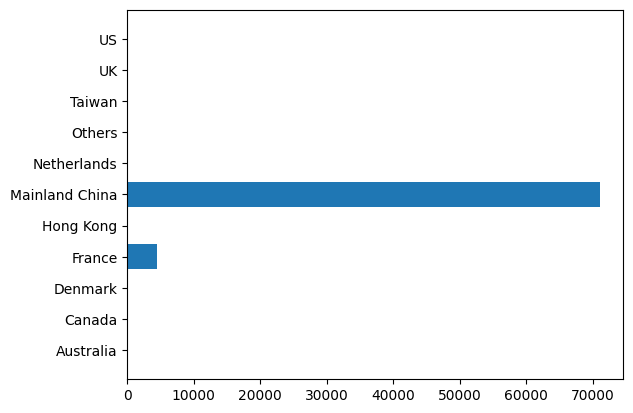

In [20]:
plt.barh(unique_countries, country_confirmed_case)
plt.show()

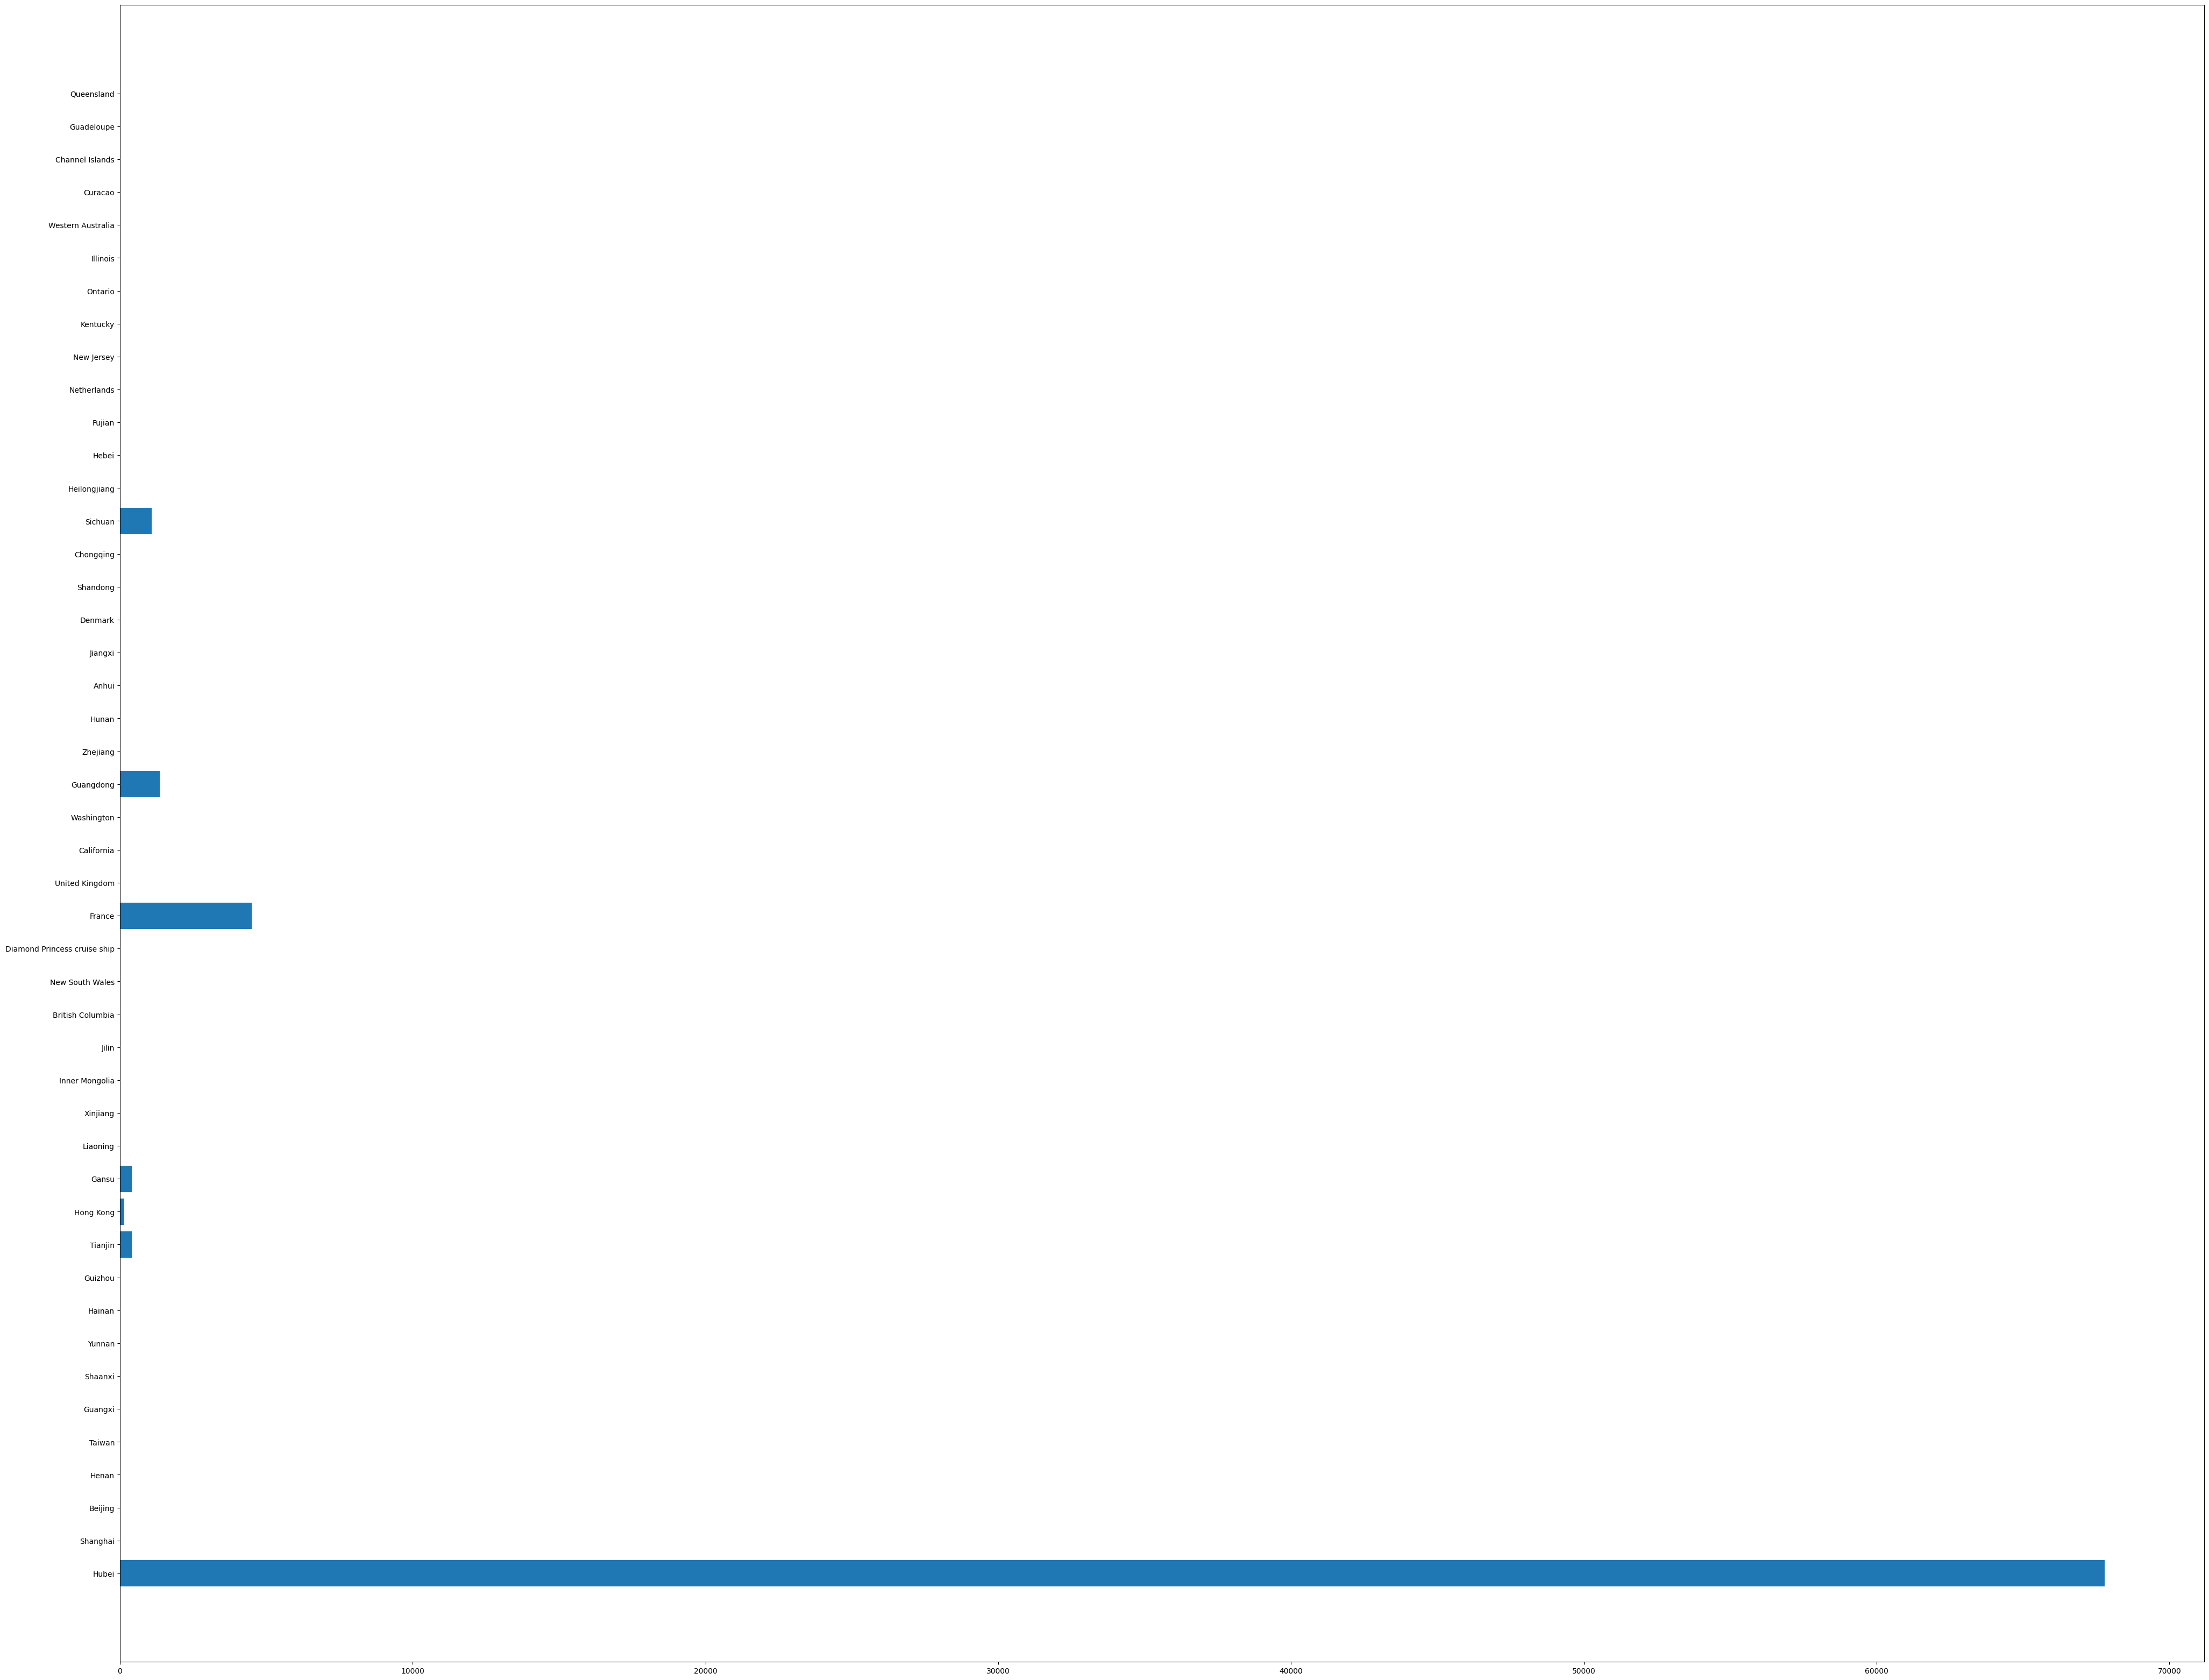

In [21]:
plt.figure(figsize=(50,40))
plt.barh(unique_provinces, province_confirmed_case)
plt.show()

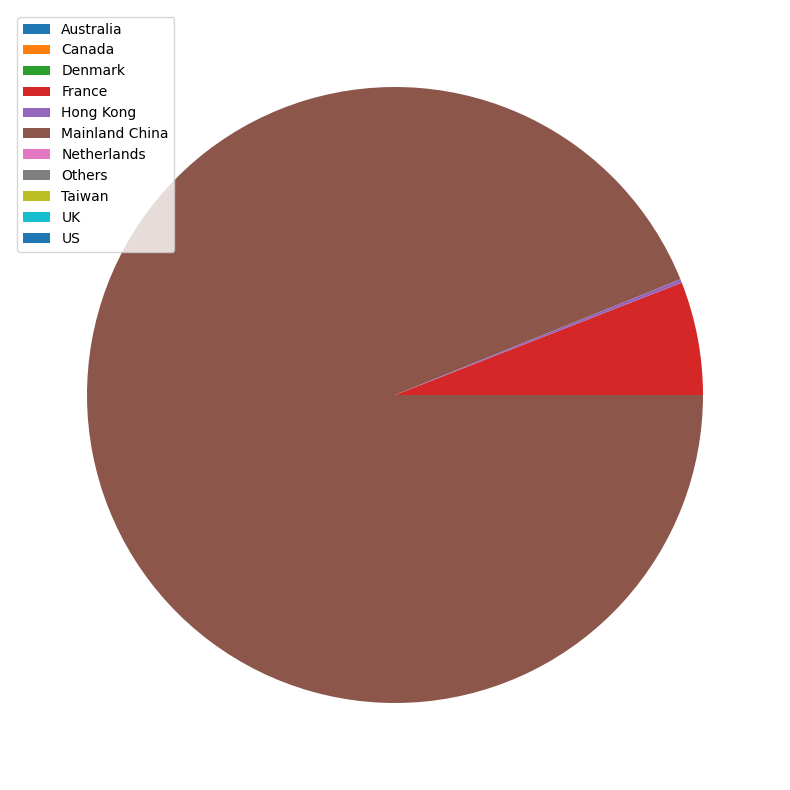

In [22]:
plt.figure(figsize=(10,10))
plt.pie(country_confirmed_case)
plt.legend(unique_countries, loc='best')
plt.show()

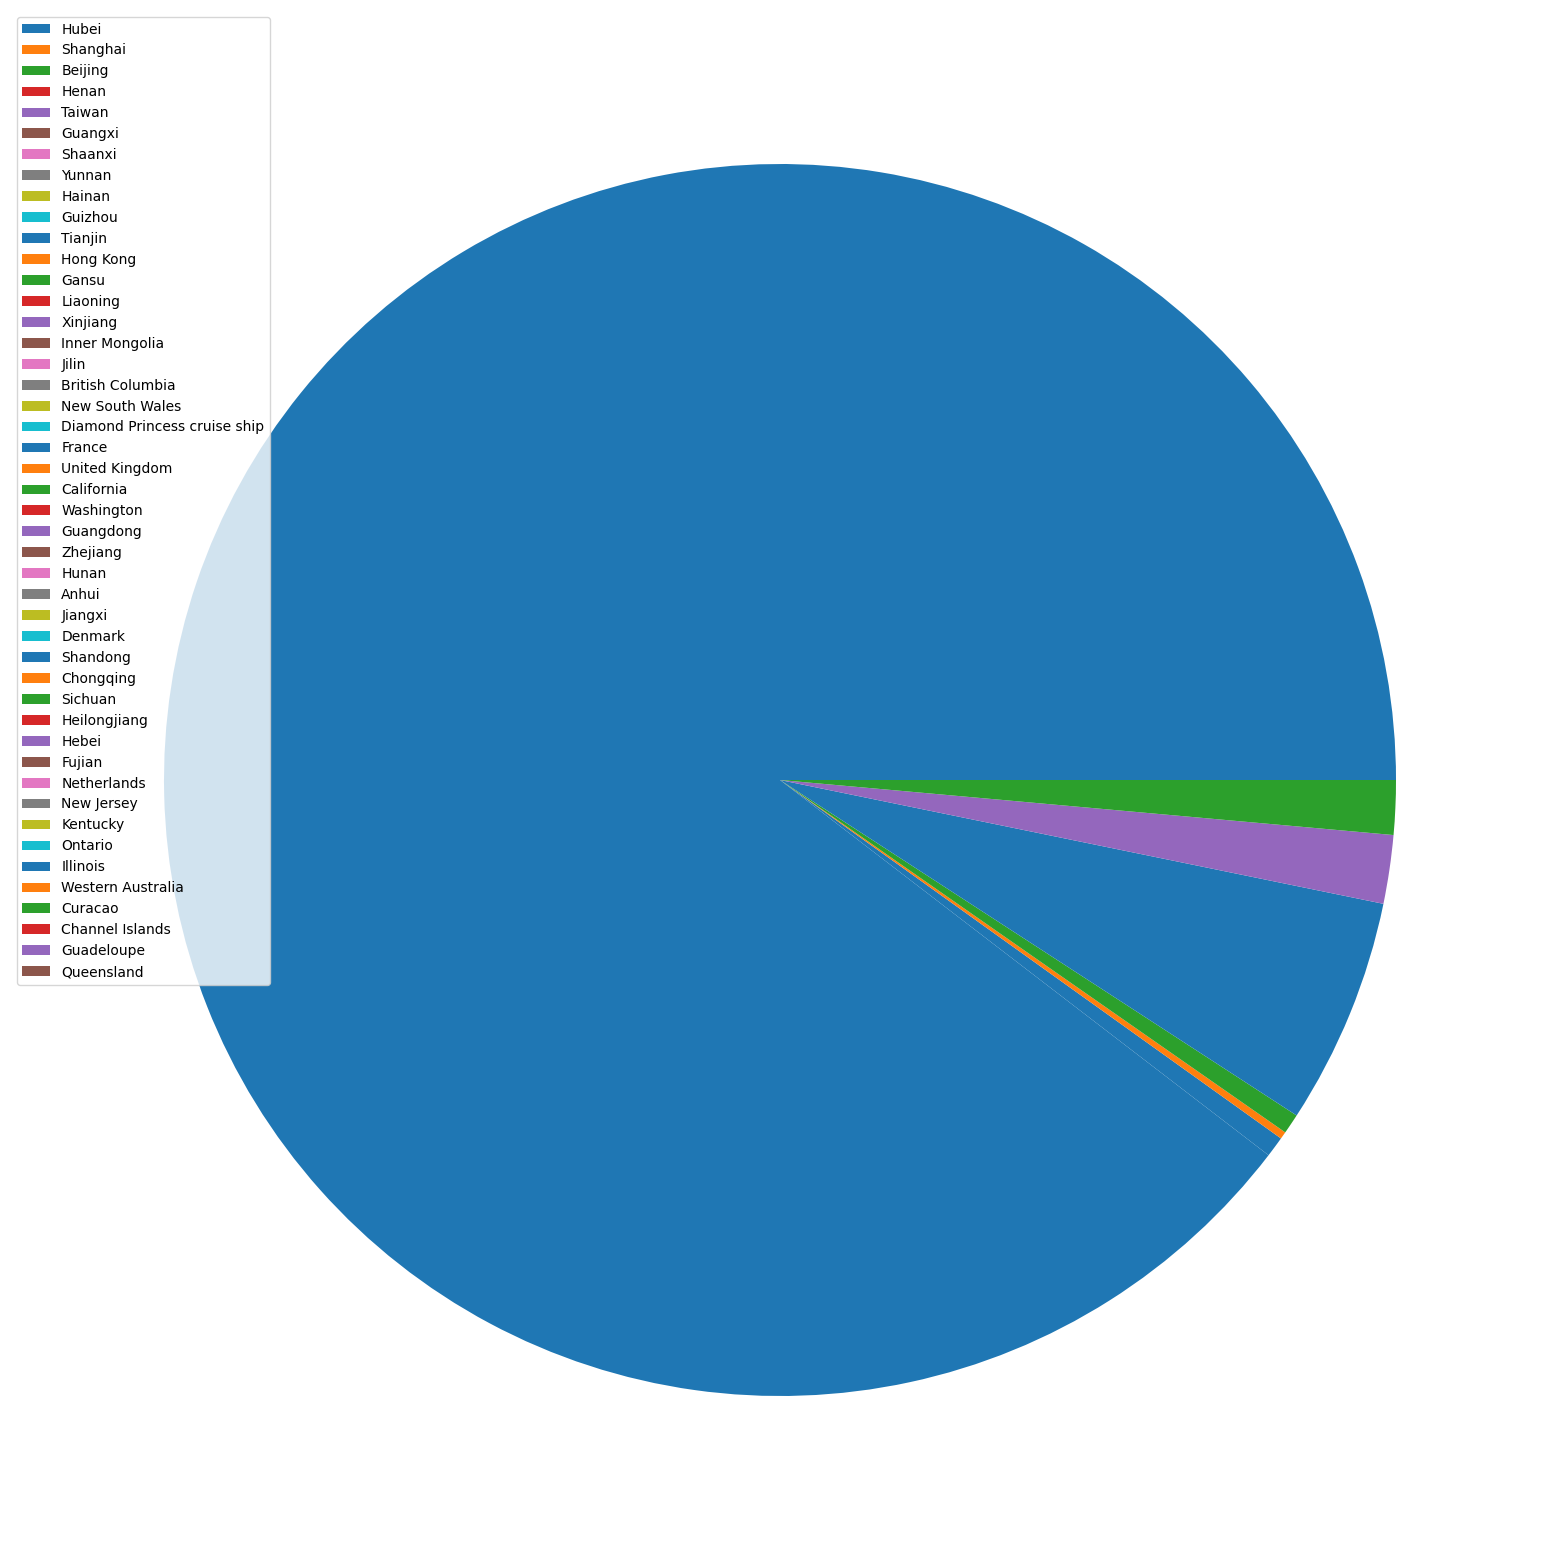

In [23]:
plt.figure(figsize=(20,20))
plt.pie(province_confirmed_case)
plt.legend(unique_provinces, loc='best')
plt.show()